In [1]:
import torch
from dalle_pytorch import VQGanVAE
from PIL import Image
from torchvision import transforms

2023-11-14 13:02:12.442631: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-14 13:02:12.905492: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-14 13:02:12.905551: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-14 13:02:12.906715: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-14 13:02:13.088182: I tensorflow/core/platform/cpu_feature_g

In [2]:
vae = VQGanVAE() 

Working with z of shape (1, 256, 16, 16) = 65536 dimensions.


/home/dan/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/dan/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


loaded pretrained LPIPS loss from taming/modules/autoencoder/lpips/vgg.pth
VQLPIPSWithDiscriminator running with hinge loss.
Loaded VQGAN from /home/dan/.cache/dalle/vqgan.1024.model.ckpt and /home/dan/.cache/dalle/vqgan.1024.config.yml


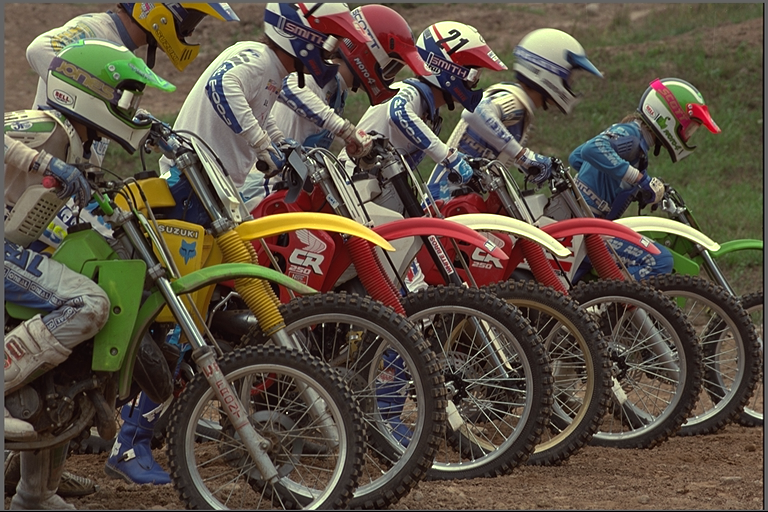

In [12]:
img = Image.open('kodim05.png')
x = transforms.PILToTensor()(img)
x = x.to(torch.float).unsqueeze(0)
x = (x/255)
img

In [13]:
z = vae.model.encoder.forward(x)
x̂ = vae.model.decoder.forward(z)

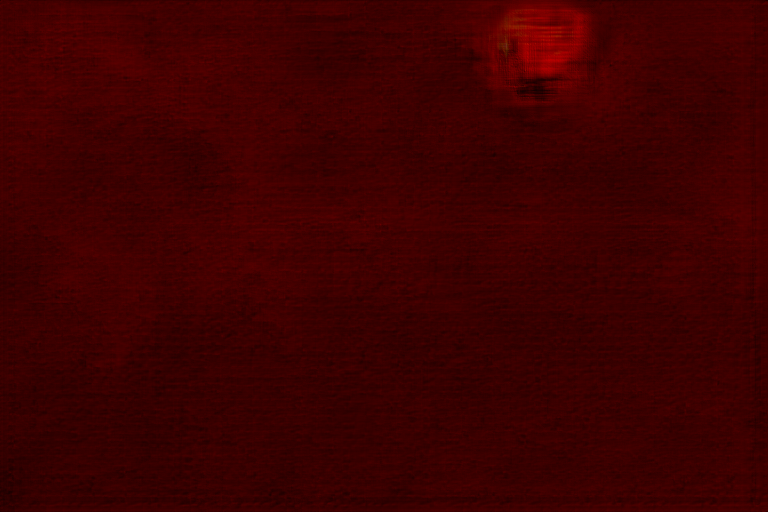

In [17]:
y = x̂[0].clamp(min=0,max=1)
# y = 255*y
# y = y.to(torch.uint8)
transforms.ToPILImage()(y)

In [16]:
y.max()

tensor(187, dtype=torch.uint8)